In [23]:
import pandas as pd
from fredapi import Fred
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import statsmodels.api as sm
import numpy as np
import datetime

In [2]:
with open(r"C:\Users\matthewsomma\Documents\US Home Sales Forecast\key.txt") as f:
   key = f.read()

fred = Fred(key)

In [3]:
Rates = pd.DataFrame(fred.get_series('MORTGAGE30US')).rename(columns={0:'Rates'})
DGS10 = pd.DataFrame(fred.get_series('DGS10')).rename(columns={0:'GS10'})
DGS5 = pd.DataFrame(fred.get_series('DGS5')).rename(columns={0:'GS5'})
DGS1 = pd.DataFrame(fred.get_series('DGS1')).rename(columns={0:'GS1'})
DGS3M = pd.DataFrame(fred.get_series('DGS3MO')).rename(columns={0:'GS3M'})

In [4]:
Rates = pd.DataFrame(Rates.groupby(pd.PeriodIndex(Rates.index, freq="M"))['Rates'].mean())
Rates.index = pd.PeriodIndex(Rates.index, freq='M').to_timestamp()
GS10 = pd.DataFrame(DGS10.groupby(pd.PeriodIndex(DGS10.index, freq="M"))['GS10'].mean())
GS10.index = pd.PeriodIndex(GS10.index, freq='M').to_timestamp()
GS5 = pd.DataFrame(DGS5.groupby(pd.PeriodIndex(DGS5.index, freq="M"))['GS5'].mean())
GS5.index = pd.PeriodIndex(GS5.index, freq='M').to_timestamp()
GS1 = pd.DataFrame(DGS1.groupby(pd.PeriodIndex(DGS1.index, freq="M"))['GS1'].mean())
GS1.index = pd.PeriodIndex(GS1.index, freq='M').to_timestamp()
GS3M = pd.DataFrame(DGS3M.groupby(pd.PeriodIndex(DGS3M.index, freq="M"))['GS3M'].mean())
GS3M.index = pd.PeriodIndex(GS3M.index, freq='M').to_timestamp()

In [5]:
rate_df = pd.merge(Rates,GS10,left_index=True,right_index=True)
rate_df = rate_df.merge(GS5,left_index=True,right_index=True)
rate_df = rate_df.merge(GS1,left_index=True,right_index=True)
rate_df = rate_df.merge(GS3M,left_index=True,right_index=True)
rate_df

,Rates,GS10,GS5,GS1,GS3M
1981-09-01,18.1600,15.323810,15.930000,16.522857,15.607143
1981-10-01,18.4540,15.148095,15.406667,15.381429,14.230952
1981-11-01,17.8250,13.392778,13.375556,12.408333,11.345556
1981-12-01,16.9460,13.724545,13.600455,12.850000,11.319048
1982-01-01,17.4850,14.594000,14.645500,14.318000,12.918000
...,...,...,...,...,...
2022-07-01,5.4125,2.896000,2.963500,3.019500,2.298000
2022-08-01,5.2225,2.897826,3.027391,3.275217,2.721739
2022-09-01,6.1120,3.519048,3.696667,3.891905,3.221905
2022-10-01,6.9000,3.983500,4.178000,4.427500,3.872500


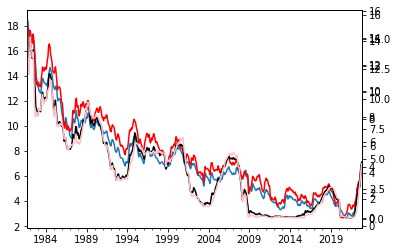

In [6]:
ax = rate_df['Rates'].plot()
ax2 = ax.twinx()
ax2 = rate_df['GS10'].plot(c='red')
ax3 = ax.twinx()
ax3 = rate_df['GS5'].plot(c='green')
ax4 = ax.twinx()
ax4 = rate_df['GS1'].plot(c='black')
ax5 = ax.twinx()
ax5 = rate_df['GS3M'].plot(c='pink')

(-10.736440788078983,
 2.8909646306484163e-19,
 2,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 -181.12279488706986)

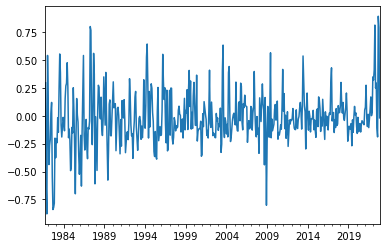

In [7]:
result=adfuller(rate_df['Rates'].dropna())
rate_df['1RateDiff'] = rate_df['Rates']-rate_df['Rates'].shift(1)
rate_df['1RateDiff'].plot(label='1d')
result = adfuller(rate_df['1RateDiff'].dropna())
result

(-11.265446591635678,
 1.5837277956372937e-20,
 2,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 -41.03004685800397)

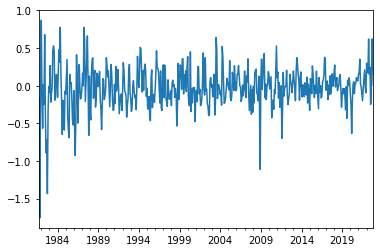

In [8]:
result=adfuller(rate_df['GS10'].dropna())
rate_df['1GS10Diff'] = rate_df['GS10']-rate_df['GS10'].shift(1)
rate_df['1GS10Diff'].plot(label='1d')
result = adfuller(rate_df['1GS10Diff'].dropna())
result

(-11.080793312182683,
 4.316534691027888e-20,
 2,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 9.512939513544325)

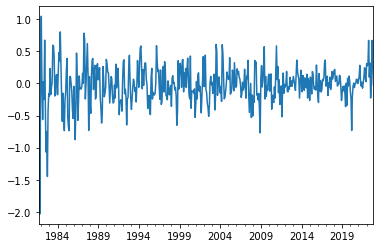

In [9]:
result=adfuller(rate_df['GS5'].dropna())
rate_df['1GS5Diff'] = rate_df['GS5']-rate_df['GS5'].shift(1)
rate_df['1GS5Diff'].plot(label='1d')
result = adfuller(rate_df['1GS5Diff'].dropna())
result

(-10.335729290190732,
 2.7672175919256563e-18,
 2,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 -128.68979958210457)

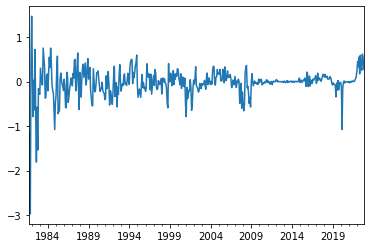

In [10]:
result=adfuller(rate_df['GS1'].dropna())
rate_df['1GS1Diff'] = rate_df['GS1']-rate_df['GS1'].shift(1)
rate_df['1GS1Diff'].plot(label='1d')
result = adfuller(rate_df['1GS1Diff'].dropna())
result

(-5.467101885917749,
 2.444943566427339e-06,
 9,
 484,
 {'1%': -3.4439333076538854,
  '5%': -2.8675301216074414,
  '10%': -2.56996050355167},
 -224.64116794757524)

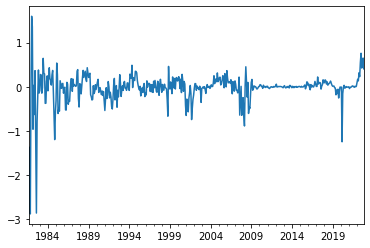

In [11]:
result = adfuller(rate_df['GS3M'].dropna())
rate_df['1GS3MDiff'] = rate_df['GS3M']-rate_df['GS3M'].shift(1)
rate_df['1GS3MDiff'].plot(label='1d')
result = adfuller(rate_df['1GS3MDiff'].dropna())
result

In [12]:
arr1 = np.array(rate_df[['1GS10Diff','1GS5Diff','1GS1Diff','1GS3MDiff']].dropna()).reshape(-1,4)
arr2 = np.array(rate_df['1RateDiff'].dropna()).reshape(-1,1)
stepwise_fit = auto_arima(arr2,arr1, start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-320.880, Time=0.67 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-453.372, Time=5.73 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.78 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-322.089, Time=1.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-326.659, Time=2.52 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-489.271, Time=17.12 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=-544.923, Time=19.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-547.899, Time=8.82 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=7.44 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=19.40 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-547.589, Time=18.57 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=21.57 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=-540.021, Time=8.05 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  494
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                 292.958
Date:                              Mon, 21 Nov 2022   AIC                           -563.917
Time:                                      16:25:53   BIC                           -517.959
Sample:                                           0   HQIC                          -545.855
                                              - 494                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.001      1.441      0.150      -0.001       0.004
x1            -0.0755      0.074     -1.015      0.310      -0.221       0.070
x2             0.9111      0.095      9.595      0.000       0.725       1.097
x3            -0.2587      0.057     -4.538      0.000      -0.370      -0.147
x4            -0.0031      0.031     -0.101      0.920      -0.063       0.057
ar.L1          0.1960      0.031      6.300      0.000       0.135       0.257
ar.L2         -0.1879      0.031     -6.101      0.000      -0.248      -0.128
ar.L3          0.1407      0.038      3.737      0.000       0.067       0.214
ar.S.L12      -0.0980      0.049     -2.005      0.045      -0.194      -0.002
ma.S.L12      -0.8710      0.045    -19.276      0.000      -0.960      -0.782
sigma2         0.0167      0.001     19.779      0.000       0.015       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               236.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model=sm.tsa.SARIMAX(rate_df['Rates'],rate_df[['GS10','GS5','GS1','GS3M']],order=(3,0,0),seasonal_order=(1, 1, 1, 12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Rates   No. Observations:                  495
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                 287.146
Date:                              Mon, 21 Nov 2022   AIC                           -554.292
Time:                                      16:26:58   BIC                           -512.492
Sample:                                  09-01-1981   HQIC                          -537.866
                                       - 11-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GS10           0.0077      0.076      0.100      0.920      -0.142       0.157
GS5            0.8235      0.099      8.346      0.000       0.630       1.017
GS1           -0.2465      0.058     -4.249      0.000      -0.360      -0.133
GS3M           0.0151      0.032      0.478      0.632      -0.047       0.077
ar.L1          1.1781      0.028     41.937      0.000       1.123       1.233
ar.L2         -0.3389      0.040     -8.561      0.000      -0.417      -0.261
ar.L3          0.1587      0.029      5.486      0.000       0.102       0.215
ar.S.L12      -0.0971      0.050     -1.928      0.054      -0.196       0.002
ma.S.L12      -0.8711      0.046    -19.030      0.000      -0.961      -0.781
sigma2         0.0171      0.001     21.571      0.000       0.016       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               317.47
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:ylabel='Density'>

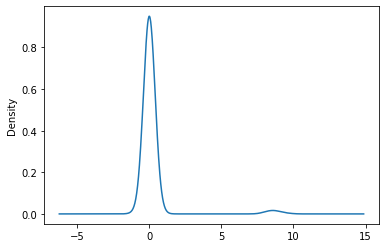

In [21]:
result.resid.plot(kind='kde')

In [30]:
from pandas.tseries.offsets import DateOffset
months = (datetime.datetime(2023,12,1).year -rate_df.index.max().year) * 12 + (datetime.datetime(2023,12,1).month -rate_df.index.max().month)
new_dates=[rate_df.index[-1]+DateOffset(months=x) for x in range(1,months+1)]
df_pred=pd.DataFrame(index=new_dates,columns =rate_df.columns)
df_pred.tail()

,Rates,GS10,GS5,GS1,GS3M,1RateDiff,1GS10Diff,1GS5Diff,1GS1Diff,1GS3MDiff
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df2=pd.concat([rate_df,df_pred])
fillGS10 = pd.Series([2.9777,3.0245,3.229,3.265,3.297,3.303,3.329,3.332,3.3331,3.3345,3.3348,3.3502,3.3623,3.3675,3.3784,3.3841,3.4012])
fillGS5 = pd.Series([3.0237,3.2218,3.6243,3.9884,4.1207,4.2023,4.3039,4.3158,4.3483,4.3315,4.2955,4.2502,4.1957,4.1568,4.0934,4.0006,3.9432])
fillGS1 = pd.Series([3.2721,3.5024,3.9114,4.2661,4.3796,4.4375,4.5135,4.4999,4.5082,4.469,4.4129,4.3497,4.2795,4.2271,4.1522,4.0495,3.9838])
fillGS3M = pd.Series([2.6984,2.7892,2.8627,3.1678,3.219,3.3466,3.3589,3.3512,3.3562,3.3531,3.3511,3.3508,3.3456,3.3423,3.3401,3.3378,.3346])
df2.loc[df2.GS10.isnull(), 'GS10'] = fillGS10.values
df2.loc[df2.GS5.isnull(), 'GS5'] = fillGS5.values
df2.loc[df2.GS1.isnull(), 'GS1'] = fillGS1.values
df2.loc[df2.GS3M.isnull(), 'GS3M'] = fillGS3M.values
df2.GS10 = df2.GS10.astype(float)
df2.GS5 = df2.GS5.astype(float)
df2.GS1 = df2.GS1.astype(float)
df2.GS3M = df2.GS3M.astype(float)
df2.tail(24)

,Rates,GS10,GS5,GS1,GS3M,1RateDiff,1GS10Diff,1GS5Diff,1GS1Diff,1GS3MDiff
2022-05-01,5.2300,2.898095,2.874286,2.059524,0.992857,0.2475,0.150595,0.096786,0.172524,0.229357
2022-06-01,5.5220,3.143333,3.190000,2.651429,1.538571,0.2920,0.245238,0.315714,0.591905,0.545714
2022-07-01,5.4125,2.896000,2.963500,3.019500,2.298000,-0.1095,-0.247333,-0.226500,0.368071,0.759429
2022-08-01,5.2225,2.897826,3.027391,3.275217,2.721739,-0.1900,0.001826,0.063891,0.255717,0.423739
2022-09-01,6.1120,3.519048,3.696667,3.891905,3.221905,0.8895,0.621222,0.669275,0.616687,0.500166
2022-10-01,6.9000,3.983500,4.178000,4.427500,3.872500,0.7880,0.464452,0.481333,0.535595,0.650595
2022-11-01,6.8800,3.991667,4.155833,4.707500,4.278333,-0.0200,0.008167,-0.022167,0.280000,0.405833
2022-12-01,NaN,2.977700,3.023700,3.272100,2.698400,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,3.024500,3.221800,3.502400,2.789200,NaN,NaN,NaN,NaN,NaN
2023-02-01,NaN,3.229000,3.624300,3.911400,2.862700,NaN,NaN,NaN,NaN,NaN


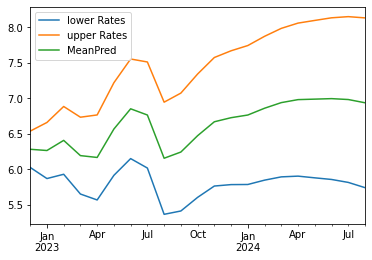

In [33]:
excog_fore = df2.loc['2022-04-01':'2023-12-01',['GS10','GS5','GS1','GS3M']]
fore = result.get_forecast(steps=len(excog_fore), exog=excog_fore)
pred_df = fore.conf_int()
pred_df['MeanPred'] = fore.predicted_mean
pred_df.plot()
pred_df['MeanPred'].to_csv('RatePred.csv')


In [37]:
pred_df

,lower Rates,upper Rates,MeanPred
2022-12-01,6.023138,6.535326,6.279232
2023-01-01,5.866150,6.657632,6.261891
2023-02-01,5.926547,6.883162,6.404854
2023-03-01,5.647840,6.731775,6.189807
2023-04-01,5.564059,6.763739,6.163899
2023-05-01,5.911703,7.218502,6.565103
2023-06-01,6.147728,7.553103,6.850415
2023-07-01,6.014403,7.511198,6.762800
2023-08-01,5.361511,6.944032,6.152772
2023-09-01,5.408486,7.071999,6.240242
